In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline
df = pd.read_csv("C:/Users/1/Desktop/july4_snapshot.csv")

In [81]:
df.head()

,visitor,day_pass,season_ticket,domestic,state,country,gender,age,maine_res,stay_four,payment_method,ice_cream_purch,ice_cream_flavor,sky_chair,ferris_wheel,lobster_claw,lobster_junior,merch_spend,lobsterama_spend
0,1,1,No,1,NY,USA,0,32,No,1,0,1,Vanilla,1,0,0,1,34.529611,24.95
1,2,0,Yes,1,Other,USA,1,43,No,1,0,1,Chocolate,0,0,1,0,23.811135,16.58
2,3,1,No,1,ME,USA,1,28,Yes,1,0,0,None,1,1,0,1,49.231936,29.94
3,4,0,Yes,1,NH,USA,1,35,No,0,0,0,None,0,1,1,0,55.508722,49.95
4,5,1,No,0,NaN,MEX,1,44,No,1,0,1,Vanilla,0,1,0,0,61.019885,36.62


B: 5 rows of the dataset are visible in Jupyter now. 

In [82]:
print(df.shape)

(5216, 19)


C: In this entire dataframe, there are 5216 rows and 19 columns.

In [83]:
df.describe()

,visitor,day_pass,domestic,gender,age,stay_four,payment_method,ice_cream_purch,sky_chair,ferris_wheel,lobster_claw,lobster_junior,merch_spend,lobsterama_spend
count,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000
mean,2608.500000,0.622316,0.791219,0.502109,36.301764,0.599310,0.146089,0.312692,0.493098,0.474118,0.277416,0.403374,41.725082,28.722268
std,1505.873833,0.484854,0.406476,0.500043,6.068244,0.490085,0.353229,0.463634,0.500000,0.499378,0.447766,0.490622,10.829337,10.557965
min,1.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.240784,-11.670000
25%,1304.750000,0.000000,1.000000,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.058217,22.257500
50%,2608.500000,1.000000,1.000000,1.000000,36.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.735267,29.440000
75%,3912.250000,1.000000,1.000000,1.000000,40.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,48.921079,35.255000
max,5216.000000,1.000000,1.000000,1.000000,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,82.720368,71.900000


D: Categorical variables: day_pass, season_ticket, domestic, state, country, gender, maine_res, stay_four, payment_method, ice_cream_purch, ice_cream_flavor, sky_chair, ferris_wheel, lobster_claw, lobster_junior, 
Numeric variables: visitor, age, merch_spend, lobsterama_spend

In [84]:
df['merch_spend'] = df['merch_spend'].round(2)

In [85]:
na_values = df.isna().sum()
total_na_values = na_values.sum()
percentage_nan = (total_na_values / (df.shape[0] * df.shape[1])) * 100
print(total_na_values)
print(percentage_nan.round(2))

1145
1.16


F: The total number of missing values is 1145.
The percentage of NaN values in the dataframe is 1.16%.

In [86]:
missing_percentage = df.isna().mean() * 100
print(missing_percentage)

visitor              0.000000
day_pass             0.000000
season_ticket        0.000000
domestic             0.000000
state               20.878067
country              1.073620
gender               0.000000
age                  0.000000
maine_res            0.000000
stay_four            0.000000
payment_method       0.000000
ice_cream_purch      0.000000
ice_cream_flavor     0.000000
sky_chair            0.000000
ferris_wheel         0.000000
lobster_claw         0.000000
lobster_junior       0.000000
merch_spend          0.000000
lobsterama_spend     0.000000
dtype: float64


In [87]:
conda install -c conda-forge/label/gcc7 missingno

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:>

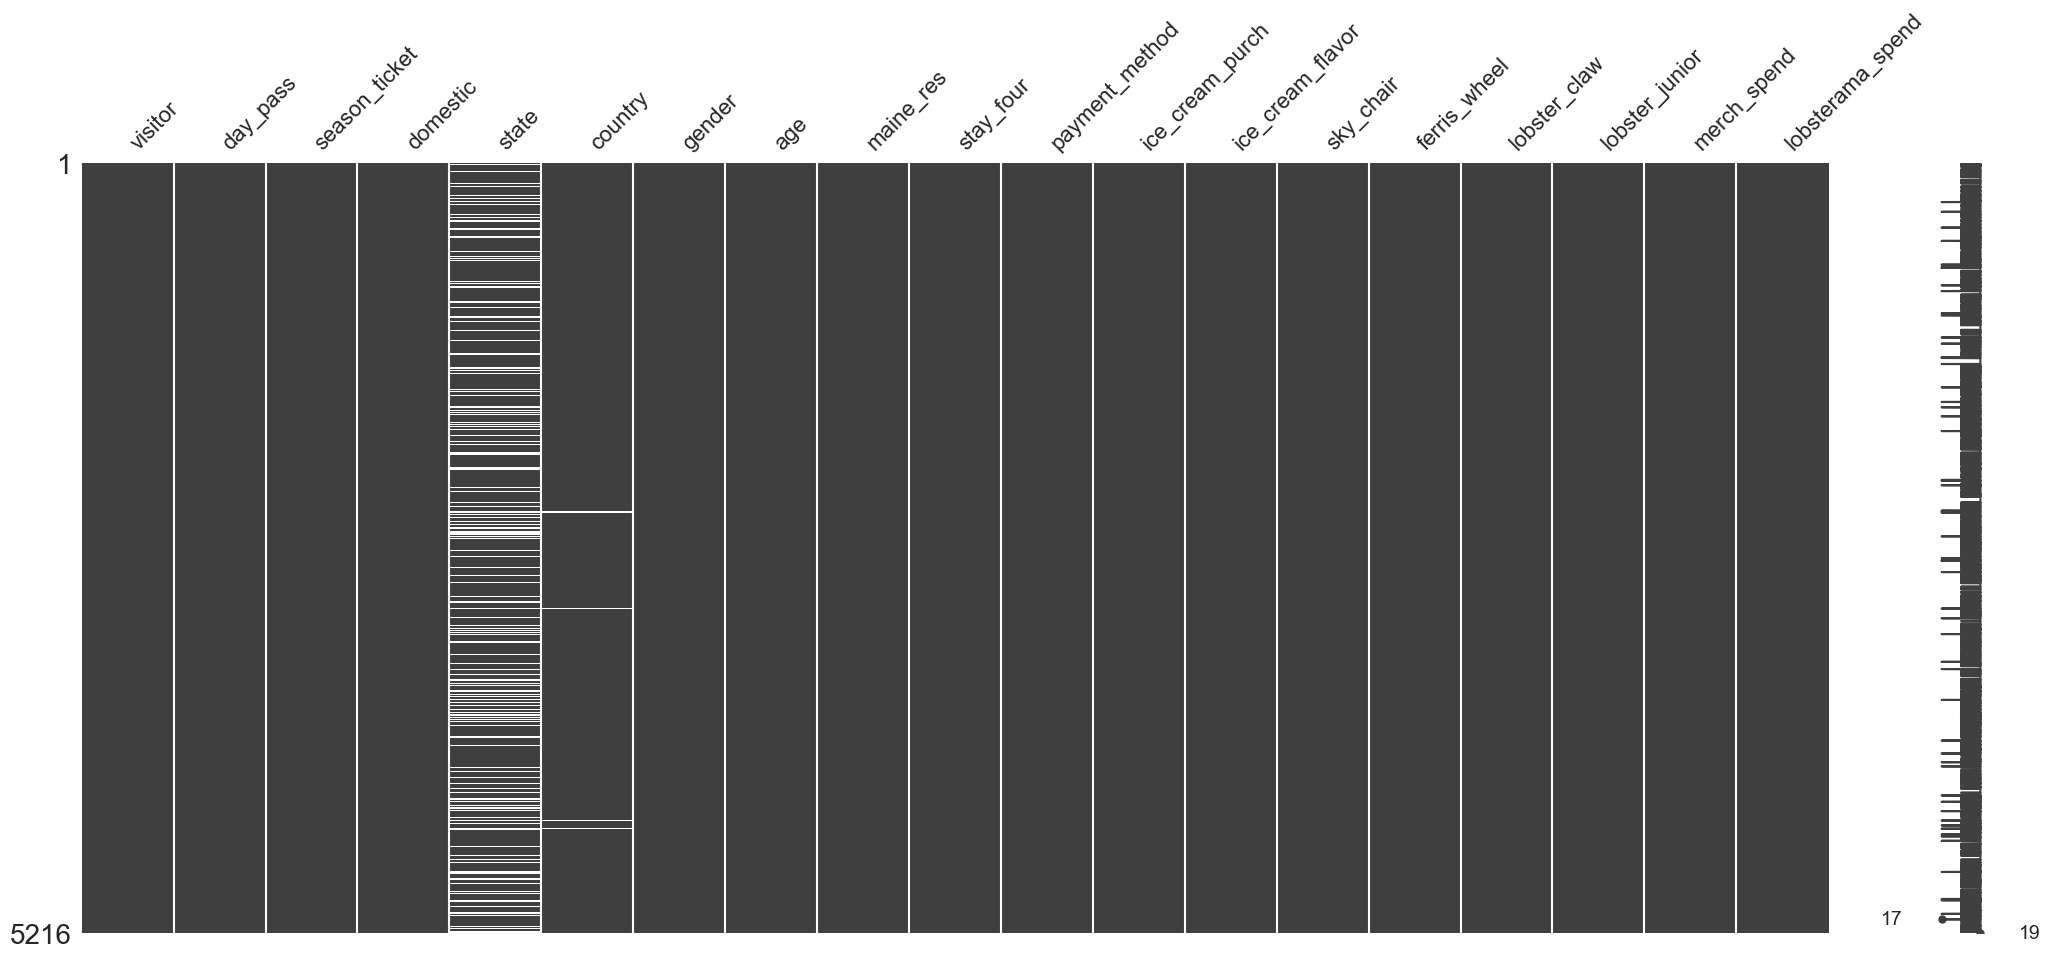

In [88]:
import missingno as msno
msno.matrix(df)

<AxesSubplot:>

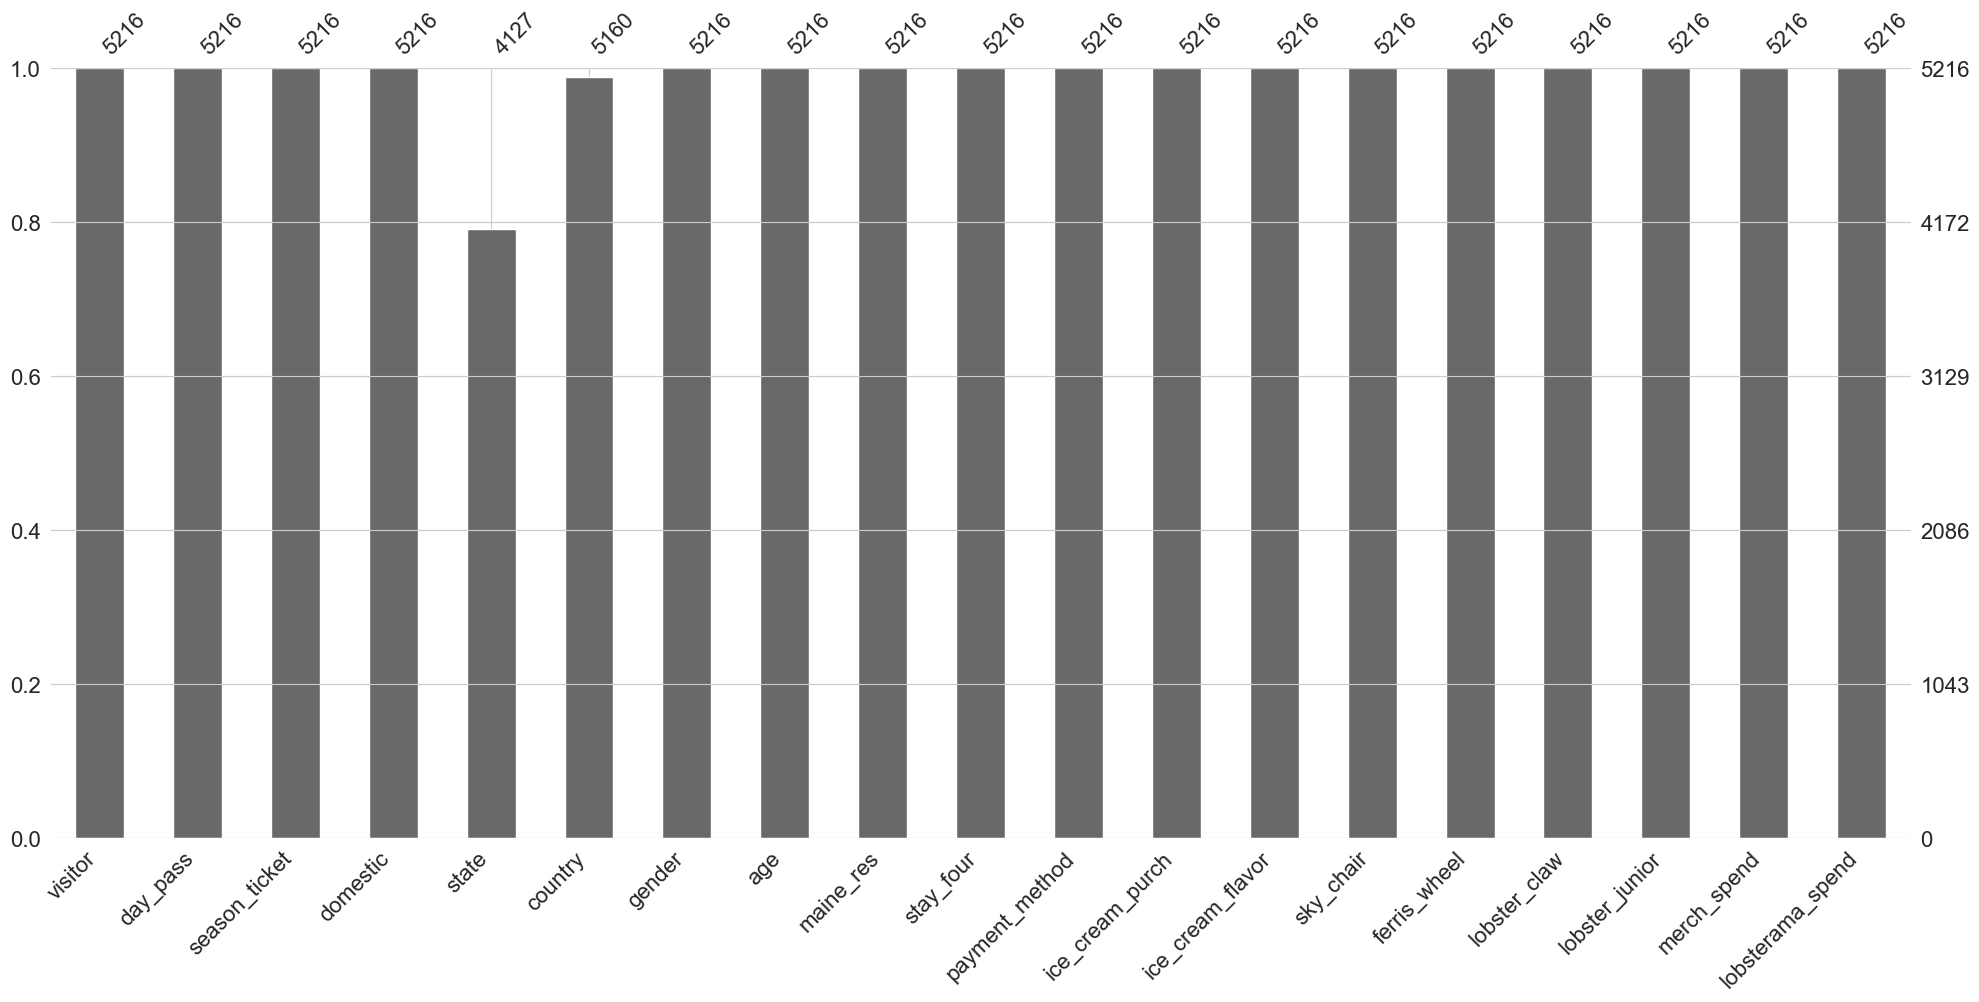

In [89]:
msno.bar(df)

In [90]:
subset_s = df[df['state'].isnull()]
subset_s

,visitor,day_pass,season_ticket,domestic,state,country,gender,age,maine_res,stay_four,payment_method,ice_cream_purch,ice_cream_flavor,sky_chair,ferris_wheel,lobster_claw,lobster_junior,merch_spend,lobsterama_spend
4,5,1,No,0,NaN,MEX,1,44,No,1,0,1,Vanilla,0,1,0,0,61.02,36.62
10,11,1,No,0,NaN,CAN,1,37,No,1,0,1,Vanilla,0,0,0,0,67.39,35.51
12,13,1,No,0,NaN,CHN,1,38,No,1,0,0,None,1,1,1,1,58.12,30.27
14,15,1,No,0,NaN,BRA,1,40,No,1,0,1,Vanilla,1,1,1,0,49.35,28.40
17,18,1,No,0,NaN,CAN,0,31,No,1,0,1,Chocolate,1,0,1,1,58.28,29.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5202,5203,1,No,0,NaN,CAN,0,34,No,1,0,1,Vanilla,1,1,0,0,48.31,25.38
5205,5206,1,No,0,NaN,CAN,1,39,No,1,0,1,Chocolate,1,1,0,1,51.94,29.45
5206,5207,1,No,0,NaN,CHN,0,38,No,1,0,0,None,0,1,0,1,63.49,27.57
5207,5208,1,No,0,NaN,CAN,1,35,No,1,0,1,Chocolate,1,1,0,0,59.63,32.26


F: e.The common point is that "domestic" is 0, which means that the person are not a U.S. resident and therefore do not belong to any state. This is the reason for the NaN value.

In [117]:
def transform(x):
    if x<15:
        return 15
    return x
df['age']=df['age'].map(transform)

df.describe()

,visitor,day_pass,domestic,gender,age,stay_four,payment_method,ice_cream_purch,sky_chair,ferris_wheel,lobster_claw,lobster_junior,merch_spend,lobsterama_spend
count,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000
mean,2608.500000,0.622316,0.791219,0.502109,36.301956,0.599310,0.146089,0.312692,0.493098,0.474118,0.277416,0.403374,41.725082,28.722268
std,1505.873833,0.484854,0.406476,0.500043,6.067555,0.490085,0.353229,0.463634,0.500000,0.499378,0.447766,0.490622,10.829337,10.557965
min,1.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.240784,-11.670000
25%,1304.750000,0.000000,1.000000,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.058217,22.257500
50%,2608.500000,1.000000,1.000000,1.000000,36.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.735267,29.440000
75%,3912.250000,1.000000,1.000000,1.000000,40.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,48.921079,35.255000
max,5216.000000,1.000000,1.000000,1.000000,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,82.720368,71.900000


In [103]:
stay_4 = np.sum(df['stay_four'] == 1)
perc_four = stay_4 / len(df['stay_four']) * 100

In [17]:
dom_4 = df.loc[df['stay_four'] == 1, 'domestic'].sum()
int_4 = len(df.loc[df['stay_four'] == 1, 'domestic']) - dom_4
total_dom = len(df.loc[df['stay_four'] == 1, 'domestic'])
perc_dom = dom_4 / total_dom * 100
perc_int = int_4 / total_dom * 100

H: b.68.71% of domestic visitors stayed for more than 4 hours on July 4th, but the percentage of international visitors was 97.80%.

H: c.I think the reason is that domestic visitors do not stay for a long time because they come to the Lobster Land more often, and some rides have already been played in the past. But international visitors come to the Lobster Land only through a long trip, so they will play all the rides at once and stay longer.

In [41]:
remove_data = df.drop('maine_res', axis=1)

I: The variable 'maine_res' is deleted because it is already known from the variable 'state' whether the person is from Maine.

In [18]:
rename_pm = df.rename(columns={'payment_method': 'method_payment'})

<AxesSubplot:xlabel='maine_res', ylabel='merch_spend'>

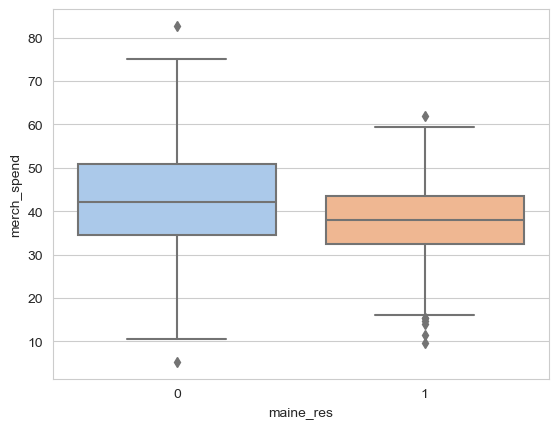

In [78]:
df['maine_res'] = df['maine_res'].replace({'Yes': 1, 'No': 0})
df['maine_res']
sns.boxplot(x='maine_res', y='merch_spend', data=df)

K: Visitors from Maine have a lower maximum value and a higher minimum value of merchandise spending than visitors from other regions. However, the overall average spending level is still lower than in other regions. This is in line with what I would expect, since Maine is not a high spending state.

<BarContainer object of 4 artists>

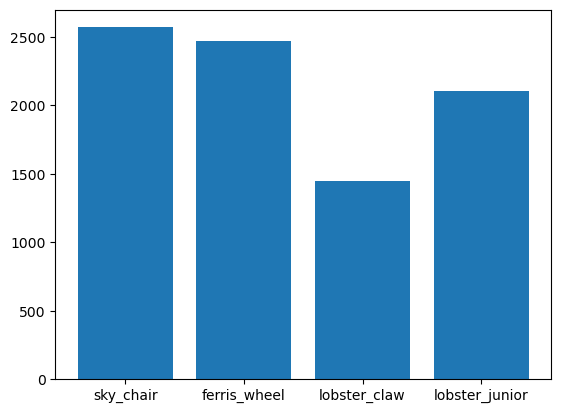

In [27]:
sc = df['sky_chair'].sum()
fw = df['ferris_wheel'].sum()
lc = df['lobster_claw'].sum()
lj = df['lobster_junior'].sum()

fig, ax = plt.subplots()
ax.bar(['sky_chair', 'ferris_wheel', 'lobster_claw', 'lobster_junior'], [sc, fw, lc, lj])

L: The "Sky Chair" ride was the most popular and the "Lobster Claw" roller coaster was the least popular on July 4th, 2021.

<AxesSubplot:xlabel='age', ylabel='Count'>

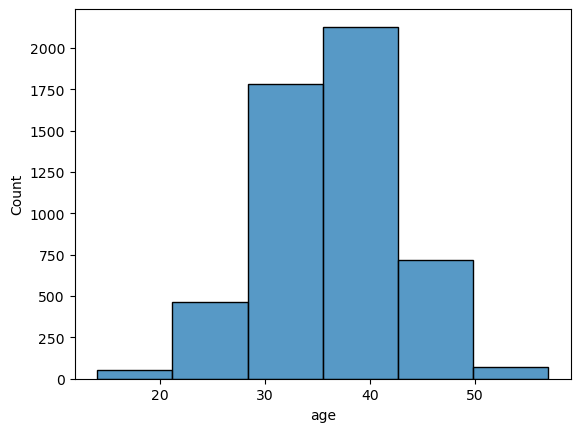

In [41]:
sns.histplot(data=df, x="age",bins=6)

M: a.To increase the number of bins in the histogramby, we can add the code "bins=n", and increase the number.

Text(0.5, 1.0, 'Histogram of Visitor Age')

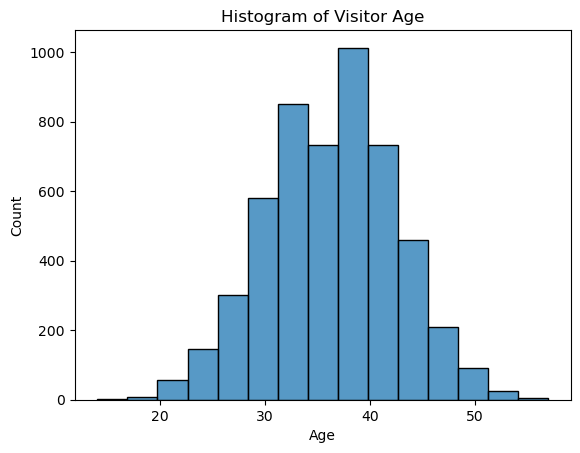

In [39]:
sns.histplot(data=df, x="age",bins=15)
plt.xlabel('Age')
plt.title('Histogram of Visitor Age')

M: c.The difference between the two histograms is that the second one is more intuitive and easier to understand. The effect of increasing the number of bins is to make the distribution of ages more detailed and be able to see a second small peak between 30 and 35 years old.

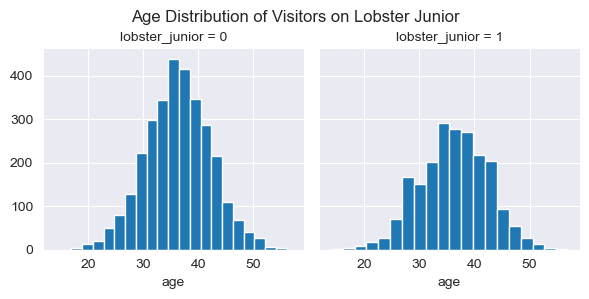

In [38]:
g = sns.FacetGrid(df, col='lobster_junior')
g.map(plt.hist, 'age', bins=20)
g.fig.suptitle('Age Distribution of Visitors on Lobster Junior')
plt.subplots_adjust(top=0.85)
sns.set_style('darkgrid')

M: d.This result did not meet my expectations. Because Lobster Junior is a kids class roller coaster, but not many children choose to play this program, the age of visitors are distributed from 25-45 years old.

<AxesSubplot:xlabel='country', ylabel='count'>

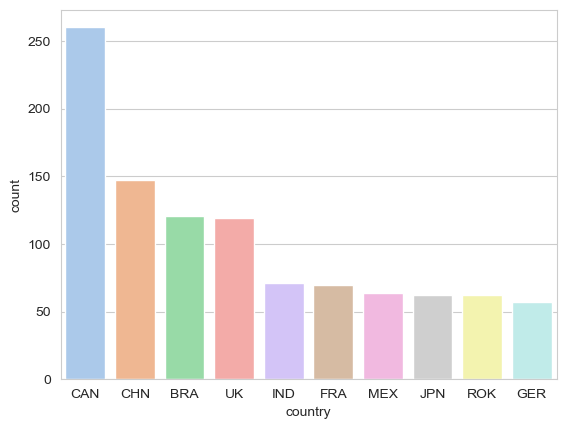

In [74]:
inter_data = df[df['domestic'] == 0]
sns.countplot(x='country', data=inter_data, order=inter_data['country'].value_counts().index)

N: On July 4, the largest number of international visitors to lobster country came from Canada, almost twice as many as second in China, and the least from GER, Germany.

<AxesSubplot:xlabel='country', ylabel='payment_method'>

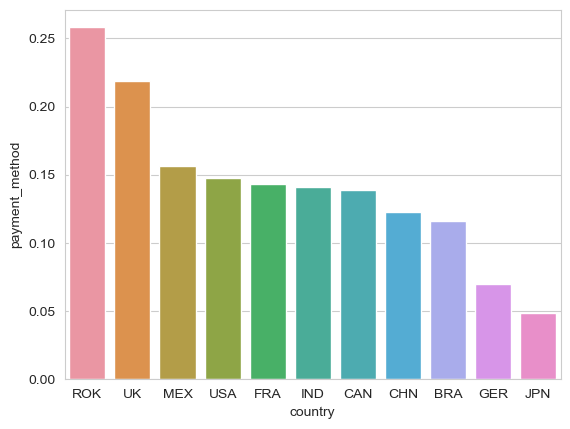

In [68]:
prop_cash = df.groupby('country')['payment_method'].mean().reset_index()
cash_sorted = prop_cash.sort_values('payment_method', ascending=False)
sns.barplot(data=cash_sorted, x='country', y='payment_method')

O: The country with the highest percentage of cash payments is ROK, Korea; the country with the lowest percentage of cash payments is JPN, Japan.

Part Ⅲ：
In this section, I am tracking my own health data. During these three days, my weight change was 56.0 kg/56.9 kg/56.1 kg, and the change of BMI was 20.6/20.9/20.6. By tracking these data, I realized that daily eating and exercise habits have a great impact on my weight, and on the second day when I ate late for dinner, it led to a big weight change. At the same time, I found that people around me are also concerned about their own weight, so I will extend this observation and continue the experiment in the future.